In [127]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import json

## GDP per capita and Gini index

Data has been downloaded from Our World in Data:

* [GPD per capita at constant 2005 $](https://ourworldindata.org/grapher/gdp-per-capita-world-bank-constant-usd?tab=table)
* [Gini coefficient](https://ourworldindata.org/grapher/economic-inequality-gini-index?tab=chart&region=Europe)
* [Population growth](https://ourworldindata.org/population-growth)

In [252]:
df1 = pd.read_csv('gdp-per-capita-world-bank-constant-usd.csv')
df2 = pd.read_csv('economic-inequality-gini-index.csv')
df3 = pd.read_csv('population-and-demography.csv')

#only preserve latest year per each country
df1 = df1[df1.groupby('Code')['Year'].transform(max) == df1['Year']]
df2 = df2[df2.groupby('Code')['Year'].transform(max) == df2['Year']]
df3 = df3[df3.groupby('Country name')['Year'].transform(max) == df3['Year']]

In [253]:
# rename cols for convenience
df1 = df1.rename(columns={'Entity': 'country_gdpc', 'Year': 'year_gdpc'})
df2 = df2.rename(columns={'Entity': 'country_gini', 'Year': 'year_gini'})
df3 = df3.rename(columns={'Country name': 'country_pop', 'Year': 'year_pop'})

In [255]:
# only keep cols of interest
df1 = df1[['country_gdpc', 'year_gdpc', 'GDP per capita (constant 2015 US$)']]
df2 = df2[['country_gini', 'year_gini', 'Gini coefficient']]
df3 = df3[['country_pop', 'year_pop', 'Population']]

In [256]:
df3

,country_pop,year_pop,Population
71,Afghanistan,2021,40099460
143,Africa (UN),2021,1393676400
215,Albania,2021,2854710
287,Algeria,2021,44177964
359,American Samoa,2021,45056
...,...,...,...
17999,Western Sahara,2021,565590
18071,World,2021,7909295000
18143,Yemen,2021,32981644
18215,Zambia,2021,19473132


In [259]:
# df3[df3['Country name']=='New Zealand'].head(5)
# df2[df2['Entity']=='New Zealand'].head(5)


# len(set(df2.country_gini))

In [263]:
# get a single df
df = df2.merge(df1, left_on='country_gini', right_on='country_gdpc')
df = df.merge(df3, left_on='country_gini', right_on='country_pop')

In [264]:
len(df), len(countries)
df.columns

Index(['country_gini', 'year_gini', 'Gini coefficient', 'country_gdpc',
       'year_gdpc', 'GDP per capita (constant 2015 US$)', 'country_pop',
       'year_pop', 'Population'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Population'}>]], dtype=object)

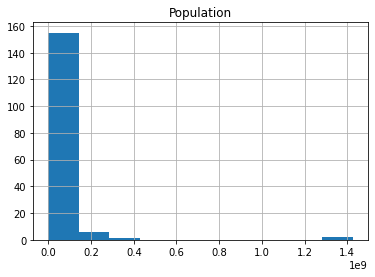

In [266]:
df.hist(column='Population', bins=10)
#plt.xscale('log')

In [267]:
np.log10(503302)

5.701828656181439

In [268]:
# bucket population into chunks

def bucket_pop(row):
    if row < 100000000:
        return 5
    elif row < 1000000000:
        return 100
    else:
        return 1000

# df['population_bucket'] = \
#     df['Population'].apply(lambda row: 10**int(np.log10(row)))

df['population_bucket'] = \
    df['Population'].apply(lambda row: bucket_pop(row))

In [269]:
df.sort_values('GDP per capita (constant 2015 US$)', ascending=False)
#df.sort_values('Population', ascending=False)
#df.sort_values('Gini coefficient', ascending=False)

,country_gini,year_gini,Gini coefficient,country_gdpc,year_gdpc,GDP per capita (constant 2015 US$),country_pop,year_pop,Population,population_bucket
84,Luxembourg,2019,0.342413,Luxembourg,2021,107792.19000,Luxembourg,2021,639330,5
67,Ireland,2018,0.306029,Ireland,2021,88966.67000,Ireland,2021,4986525,5
140,Switzerland,2018,0.331411,Switzerland,2021,87339.76000,Switzerland,2021,8691409,5
110,Norway,2019,0.277423,Norway,2021,77512.90000,Norway,2021,5403021,5
156,United States,2019,0.415356,United States,2021,61855.52000,United States,2021,336997630,100
...,...,...,...,...,...,...,...,...,...,...
85,Madagascar,2012,0.426482,Madagascar,2021,442.12160,Madagascar,2021,28915652,5
132,Somalia,2017,0.368224,Somalia,2021,427.89966,Somalia,2021,17065588,5
86,Malawi,2019,0.385432,Malawi,2021,389.37880,Malawi,2021,19889742,5
23,Central African Republic,2008,0.562366,Central African Republic,2021,370.67575,Central African Republic,2021,5457165,5


In [270]:
# remove smaller countries

df = df[df.Population>=10000000]

In [273]:
min(df1.year_gdpc)

2011

<AxesSubplot:xlabel='GDP per capita (constant 2015 US$)', ylabel='Gini coefficient'>

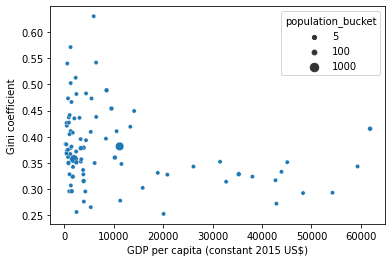

In [274]:
sns.scatterplot(data=df, x="GDP per capita (constant 2015 US$)", y="Gini coefficient", 
                size='population_bucket')


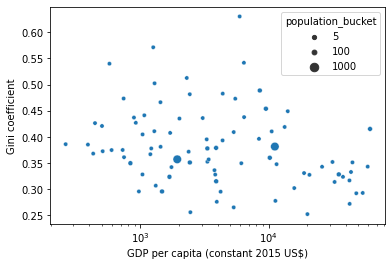

In [275]:
sns.scatterplot(data=df, x="GDP per capita (constant 2015 US$)", y="Gini coefficient", 
                size='population_bucket')
plt.xscale('log')

In [278]:
df

,country_gini,year_gini,Gini coefficient,country_gdpc,year_gdpc,GDP per capita (constant 2015 US$),country_pop,year_pop,Population,population_bucket
1,Algeria,2011,0.276157,Algeria,2021,3943.1719,Algeria,2021,44177964,5
2,Angola,2018,0.512721,Angola,2021,2299.6406,Angola,2021,34503776,5
4,Australia,2018,0.343338,Australia,2021,59341.2400,Australia,2021,25921094,5
6,Azerbaijan,2005,0.265549,Azerbaijan,2021,5344.4214,Azerbaijan,2021,10312992,5
7,Bangladesh,2016,0.323853,Bangladesh,2021,1684.4344,Bangladesh,2021,169356240,100
...,...,...,...,...,...,...,...,...,...,...
158,Uzbekistan,2003,0.352688,Uzbekistan,2021,3327.7803,Uzbekistan,2021,34081452,5
160,Vietnam,2018,0.357155,Vietnam,2021,3409.0247,Vietnam,2021,97468024,5
161,Yemen,2014,0.367071,Yemen,2018,1194.8207,Yemen,2021,32981644,5
162,Zambia,2015,0.571361,Zambia,2021,1257.9348,Zambia,2021,19473132,5


In [279]:
df[['country_gdpc', 'year_gdpc', 'GDP per capita (constant 2015 US$)', 
    'country_gini', 'year_gini', 'Gini coefficient', 
    'country_pop', 'year_pop', 'Population']].to_csv('df.csv', index=None)

In [277]:
12/9

1.3333333333333333

In [281]:
df.sort_values('Population', ascending=False).iloc[68:]

,country_gini,year_gini,Gini coefficient,country_gdpc,year_gdpc,GDP per capita (constant 2015 US$),country_pop,year_pop,Population,population_bucket
121,Rwanda,2016,0.437100,Rwanda,2021,890.18720,Rwanda,2021,13461891,5
11,Benin,2018,0.378086,Benin,2021,1214.07760,Benin,2021,12996901,5
19,Burundi,2013,0.386248,Burundi,2021,261.01938,Burundi,2021,12551215,5
148,Tunisia,2015,0.328159,Tunisia,2021,3831.43730,Tunisia,2021,12262949,5
13,Bolivia,2020,0.436153,Bolivia,2021,3061.73850,Bolivia,2021,12079474,5
9,Belgium,2019,0.272198,Belgium,2021,42901.43400,Belgium,2021,11611416,5
59,Haiti,2012,0.411038,Haiti,2021,1283.05290,Haiti,2021,11447575,5
72,Jordan,2010,0.336557,Jordan,2021,3781.52830,Jordan,2021,11148288,5
38,Dominican Republic,2020,0.396412,Dominican Republic,2021,8410.60500,Dominican Republic,2021,11117873,5
135,South Sudan,2016,0.441441,South Sudan,2015,1071.77770,South Sudan,2021,10748278,5
